In [199]:
#Importing Library
import numpy as np
import pandas as pd
import cv2
import os 
# 

In [200]:
from PIL import Image

In [201]:

images  =  []       
labels  =  [] 
train_path  =  'D://experiment//fruit example//train'
for filename in os.listdir('D://experiment//fruit example//train'):
   
    if filename.split('.')[1]  ==  'jpg':
        img  =  cv2.imread(os.path.join(train_path,filename))
        arr = Image.fromarray(img,'RGB')
        img_arr = arr.resize((50,50))
        labels.append(filename.split('_')[0])
        images.append(np.array(img_arr))

In [202]:
#Image Labels
np.unique(labels)


array(['apple', 'banana', 'mixed', 'orange'], dtype='<U6')

In [203]:
from sklearn.preprocessing import LabelEncoder
lb_encod  =  LabelEncoder()
labels = pd.DataFrame(labels)
labels = lb_encod.fit_transform(labels[0])
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

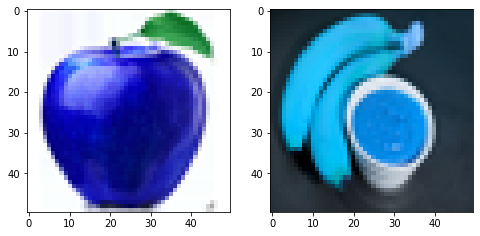

In [204]:
#Visualizing image
import matplotlib.pyplot as plt
figure = plt.figure(figsize = (8,8))
ax = figure.add_subplot(121)
ax.imshow(images[0])
bx = figure.add_subplot(122)
bx.imshow(images[80])
plt.show()

In [205]:
#Saving the image array and corresponding labels
images = np.array(images)
np.save("image",images)
np.save("labels",labels)

#Loading the images and labels that we have saved above
image = np.load("image.npy",allow_pickle = True)
labels = np.load("labels.npy",allow_pickle = True)

img_shape  = np.arange(image.shape[0])
np.random.shuffle(img_shape)
image = image[img_shape]
labels = labels[img_shape]

In [206]:
num_classes = len(np.unique(labels))
len_data = len(image)


In [207]:
len_data

240

In [214]:
x_train, x_test = image[(int)(0.1*len_data):],image[:(int)(0.1*len_data)]
y_train,y_test = labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

import keras
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [215]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.layers import Activation, Convolution2D, Dropout, Conv2D,AveragePooling2D, BatchNormalization,Flatten,GlobalAveragePooling2D
from keras import layers
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

l2_reg = 0.001
opt = Adam(lr = 0.001)

#Defining the CNN Model
cnn_model  =  Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (2,2), input_shape = (50,50, 3), activation = 'relu',kernel_regularizer = l2(l2_reg)))
cnn_model.add(MaxPool2D(pool_size = (2,2)))
cnn_model.add(Conv2D(filters = 64, kernel_size = (2,2), activation = 'relu',kernel_regularizer = l2(l2_reg)))
cnn_model.add(MaxPool2D(pool_size = (2,2)))
cnn_model.add(Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu',kernel_regularizer = l2(l2_reg)))
cnn_model.add(MaxPool2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.1))

cnn_model.add(Flatten())

cnn_model.add(Dense(64, activation = 'relu'))
cnn_model.add(Dense(16, activation = 'relu'))
cnn_model.add(Dense(4, activation = 'softmax'))

#CNN Model Summary
cnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 49, 49, 32)        416       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 23, 23, 64)        8256      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 128)       32896     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 128)        

In [216]:
# #Compiling the model
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

# Training the CNN Model
history = cnn_model.fit(x_train, y_train, batch_size=32, epochs=10,verbose=1,validation_data=(x_test, y_test))

Epoch 1/10
7/7 [==============================] - 1s 97ms/step - loss: 19.8711 - accuracy: 0.3333 - val_loss: 9.4889 - val_accuracy: 0.3333
Epoch 2/10
7/7 [==============================] - 0s 37ms/step - loss: 4.0008 - accuracy: 0.4722 - val_loss: 1.6656 - val_accuracy: 0.4167
Epoch 3/10
7/7 [==============================] - 0s 39ms/step - loss: 1.7141 - accuracy: 0.5463 - val_loss: 1.4865 - val_accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 0s 42ms/step - loss: 0.8407 - accuracy: 0.7361 - val_loss: 1.1235 - val_accuracy: 0.7083
Epoch 5/10
7/7 [==============================] - 0s 42ms/step - loss: 0.5639 - accuracy: 0.8657 - val_loss: 1.2489 - val_accuracy: 0.7083
Epoch 6/10
7/7 [==============================] - 0s 39ms/step - loss: 0.5579 - accuracy: 0.8519 - val_loss: 1.1439 - val_accuracy: 0.7083
Epoch 7/10
7/7 [==============================] - 0s 40ms/step - loss: 0.5488 - accuracy: 0.8611 - val_loss: 1.3883 - val_accuracy: 0.7500
Epoch 8/10
7/7 [==========

In [77]:
# # file1 = "weights.hdf5"
# checkpoint = ModelCheckpoint(train_path , monitor='loss', verbose=1, save_best_only=True, mode='min')
# history = cnn_model.fit(x_train,y_train,batch_size = 128,epochs = 110,verbose = 1,validation_split = 0.33)


In [217]:
#Check the performance
scores  =  cnn_model.evaluate(x_test, y_test, verbose = 1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


1/1 [==============================] - 0s 0s/step - loss: 1.4929 - accuracy: 0.7083
Test loss: 1.4929100275039673
Test accuracy: 0.7083333134651184


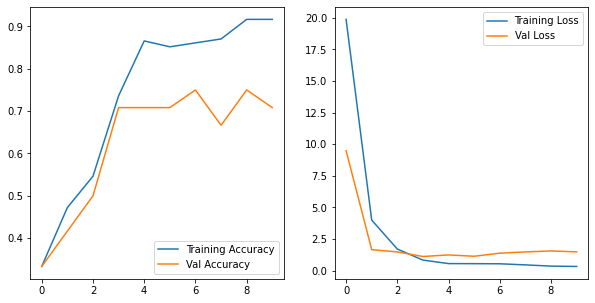

In [218]:
#Visualize the performance
figure = plt.figure(figsize = (10,5))
ax = figure.add_subplot(121)
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.legend(['Training Accuracy','Val Accuracy'])
bx = figure.add_subplot(122)
bx.plot(history.history['loss'])
bx.plot(history.history['val_loss'])
bx.legend(['Training Loss','Val Loss'])


apple


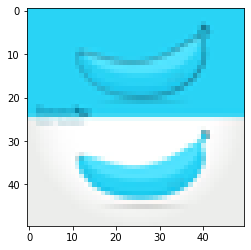

In [223]:
#Test
test_path  =  'D://experiment//fruit example//test'
t_labels = []
t_images = []
for filename in os.listdir('D://experiment//fruit example//test'):
    if filename.split('.')[1]  ==  'jpg':
        img  =  cv2.imread(os.path.join(test_path,filename))
        arr = Image.fromarray(img,'RGB')
        img_arr = arr.resize((50,50))
        t_labels.append(filename.split('_')[0])
        t_images.append(np.array(img_arr))

# test_images = np.array(test_images)
test_images = np.array(t_images)
np.save("test_image",test_images)
test_image = np.load("image.npy",allow_pickle = True)

pred = np.argmax(cnn_model.predict(test_image),axis = 1)
prediction  =  lb_encod.inverse_transform(pred)

test_image = np.expand_dims(test_image[35],axis = 0)
pred_test = np.argmax(cnn_model.predict(test_image),axis = 1)
prediction_test  =  lb_encod.inverse_transform(pred_test)

print(prediction_test[0])
plt.imshow(test_images[35])

In [ ]:
predicted_classes = cnn_model.predict(x_test)

In [ ]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [64]:
predicted_classes.shape, y_test.shape

((24,), (24, 4))

In [44]:
correct = np.where(predicted_classes==y_test)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()

Found 0 correct labels


<ipython-input-44-29a3adef0fbf>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  correct = np.where(predicted_classes==y_test)[0]


In [45]:
y_test.shape

(24, 4)

In [119]:
print(t_labels)

['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']


https://analyticsindiamag.com/fruit-recognition-using-the-convolutional-neural-network/

array([[[[ 40,  15, 146],
         [ 97,  39, 194],
         [129,  50, 225],
         ...,
         [  6, 129, 254],
         [  2,  36, 201],
         [  2,   0, 156]],

        [[  7,   2, 165],
         [  5,   0, 188],
         [ 14,   1, 201],
         ...,
         [ 27,  82, 243],
         [  1,  15, 184],
         [  1,   0, 150]],

        [[  3,   1, 168],
         [  5,   2, 182],
         [  3,   2, 191],
         ...,
         [ 28,  11, 225],
         [  5,   6, 179],
         [  1,   0, 143]],

        ...,

        [[  0,   0, 151],
         [  4,   2, 127],
         [ 53,  33, 129],
         ...,
         [ 93, 181, 252],
         [122, 187, 251],
         [153, 203, 252]],

        [[ 69,  27, 115],
         [122,  63, 135],
         [203, 130, 174],
         ...,
         [ 87, 151, 251],
         [124, 158, 251],
         [172, 175, 252]],

        [[ 93,  34, 109],
         [145,  69, 136],
         [160,  98, 160],
         ...,
         [ 85, 149, 251],
        

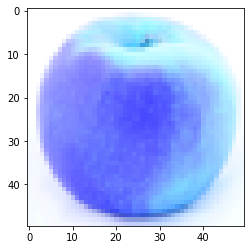

In [222]:
plt.imshow(test_images[1])